## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [7]:
# Отрисовка изображений в ячейках ноутбука
%matplotlib inline

In [8]:
# Отрисовка изображений
import matplotlib.pyplot as plt
# Работа с массивами
import numpy as np
# Библиотека для загрузки изображений из внешних источников
import requests

# Модуль для работы с байтовыми данными
from io import BytesIO
# Библиотека для работы с изображениями
from PIL import Image
# Утилиты для подготовки данных
from tensorflow.keras import utils
# Библиотека с базой рукописных цифр
from tensorflow.keras.datasets import mnist
# Подключение класса Dense - полносвязный слой
from tensorflow.keras.layers import Dense
# Подключение класса создания модели Sequential
from tensorflow.keras.models import Sequential
# Подключение библиотеки для обработки изображений
from tensorflow.keras.preprocessing import image

In [9]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [11]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

In [12]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [13]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [14]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [15]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [16]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [17]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [18]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(300, input_dim=784, activation='relu'))
# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(100, activation='relu'))
# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

In [19]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [20]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2623 - accuracy: 0.9248 - val_loss: 0.1214 - val_accuracy: 0.9639
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0998 - accuracy: 0.9706 - val_loss: 0.0930 - val_accuracy: 0.9714
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0879 - val_accuracy: 0.9715
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0712 - val_accuracy: 0.9787
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0747 - val_accuracy: 0.9774
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0815 - val_accuracy: 0.9759
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0751 - val_accuracy: 0.9792
Ep

In [21]:
model.save_weights('model.h5')
model.load_weights('model.h5')

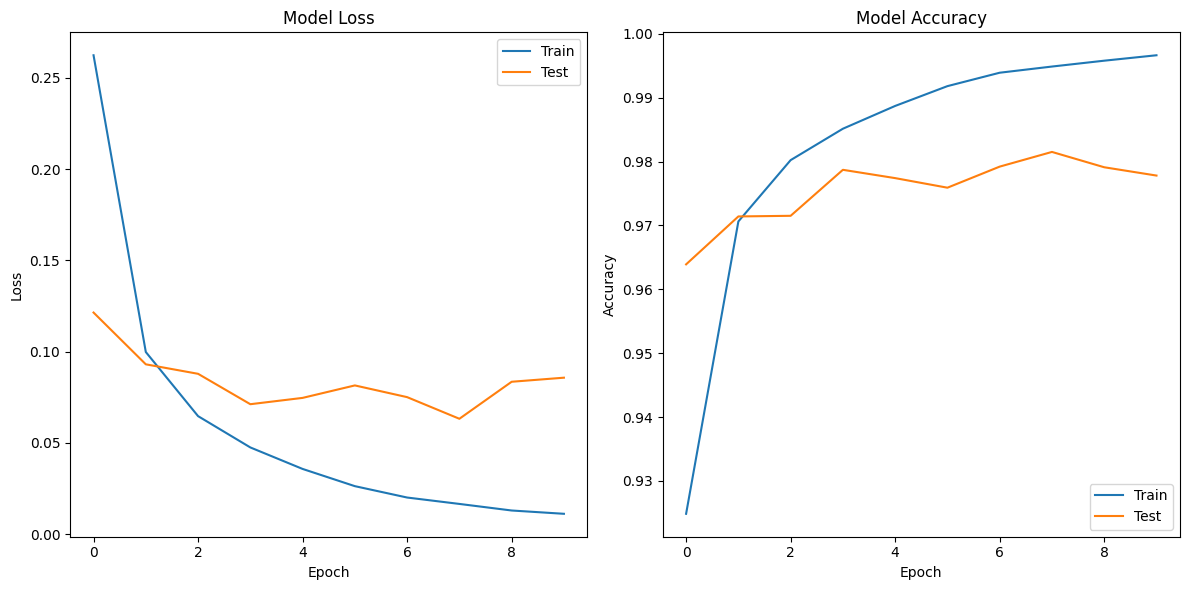

In [22]:
# Создание графика с двумя подграфиками в одной строке
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ошибки на обучающем и валидационном наборах данных
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(['Train', 'Test'], loc='upper right')

# График точности на обучающем и валидационном наборах данных
axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(['Train', 'Test'], loc='lower right')

plt.tight_layout()
plt.show()

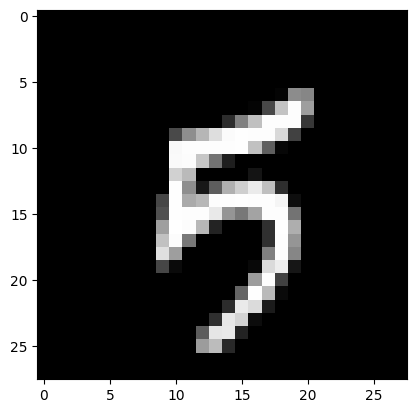

In [24]:
# Установка начального значения для генератора случайных чисел
np.random.seed(10)

# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [25]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [26]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [27]:
# Распознавание примера
prediction = model.predict(x)

1/1 [==============================] - 0s 253ms/step


In [28]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[4.1787658e-09 7.1510783e-08 3.0258570e-07 1.1076273e-03 2.1749552e-06
  9.8187029e-01 2.3877973e-09 1.0040643e-04 4.3340074e-06 1.6914766e-02]]


In [29]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 5


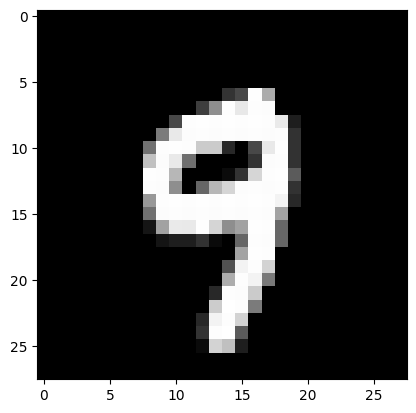

In [31]:
# Установка начального значения для генератора случайных чисел
np.random.seed(2)

# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [32]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [33]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [34]:
# Распознавание примера
prediction = model.predict(x)

1/1 [==============================] - 0s 51ms/step


In [35]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[3.8967287e-14 1.0625302e-14 4.1958292e-14 1.0110186e-06 3.0508767e-09
  1.1816351e-12 6.6959114e-20 2.2098507e-09 4.1860257e-12 9.9999893e-01]]


In [36]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 9


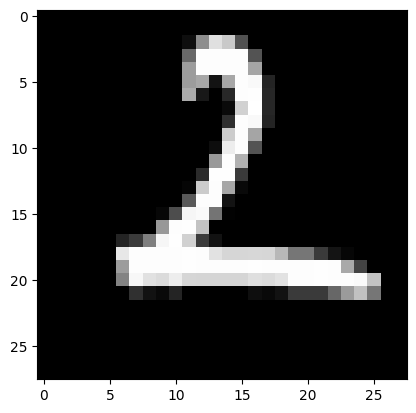

In [37]:
# Установка начального значения для генератора случайных чисел
np.random.seed(20)

# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

In [38]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [39]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [40]:
# Распознавание примера
prediction = model.predict(x)

1/1 [==============================] - 0s 83ms/step


In [41]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[2.4321005e-16 1.1150054e-09 1.0000000e+00 8.7120852e-11 2.4444549e-14
  2.2635547e-15 3.2124341e-14 2.7624158e-15 1.0235826e-13 7.1373182e-20]]


In [42]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 2


In [99]:
# URL изображения
url = "https://sun9-18.userapi.com/impg/-2m9f4NUKW2wPVgVnWwOwcYspwg-lZwdpRyAqg/psJ3qoTmrLs.jpg?size=1080x938&quality=96&sign=0fe9e60054687075135486a232ce3ffa&type=album"

# Скачать изображение
response = requests.get(url)

# Открываем изображение из байтового потока
img = Image.open(BytesIO(response.content))

# Сохраняем изображение локально
img_path = '/content/image.jpg'
img.save(img_path)

# Загрузка изображения с помощью Keras
loaded_img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

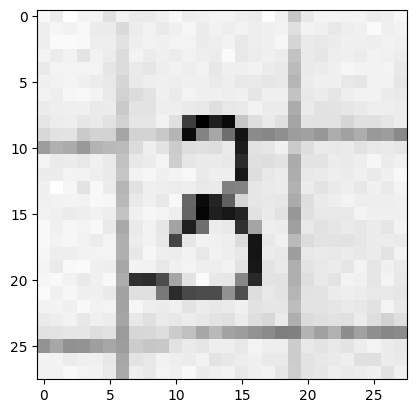

In [100]:
plt.imshow(loaded_img, cmap='gray')

# Вывод n-й картинки
plt.show()

In [101]:
loaded_img_array = image.img_to_array(loaded_img)

print("Размер массива numpy:", loaded_img_array.shape)

Размер массива numpy: (28, 28, 1)


In [102]:
# Инвертируем цвета
inverted_img_array = 255 - loaded_img_array

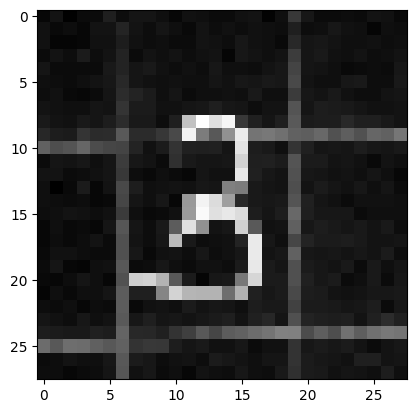

In [103]:
plt.imshow(inverted_img_array, cmap='gray')

# Вывод n-й картинки
plt.show()

In [104]:
print("Размер массива numpy после преобразования:", inverted_img_array.shape)

Размер массива numpy после преобразования: (28, 28, 1)


In [105]:
# Изменяем форму массива на одномерный массив
reshaped_img_array = inverted_img_array.reshape((1, 784))

print("Размер массива numpy после преобразования:", reshaped_img_array.shape)

Размер массива numpy после преобразования: (1, 784)


In [106]:
normalized_img_array = reshaped_img_array.astype('float32') / 255.

In [107]:
my_prediction = model.predict(normalized_img_array)
my_pred = np.argmax(my_prediction)

1/1 [==============================] - 0s 24ms/step


In [108]:
print(f'Распознана цифра: {my_pred}')

Распознана цифра: 3
